# Pymaceuticals Inc.
---




In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = mouse_metadata.merge(study_results, on = "Mouse ID")
# Display the data table for preview
combined.head ()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined ["Mouse ID"].unique (). size

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated =combined.groupby (["Mouse ID","Timepoint"]).count()["Drug Regimen"]>1
combined.groupby (["Mouse ID","Timepoint"]).count()[duplicated].index.get_level_values (0).unique ()


Index(['g989'], dtype='object', name='Mouse ID')

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_DataFrame = combined[combined["Mouse ID"]!="g989"]
clean_DataFrame.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_DataFrame ["Mouse ID"].unique (). size

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = clean_DataFrame.groupby ("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_median = clean_DataFrame.groupby ("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_var = clean_DataFrame.groupby ("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_std = clean_DataFrame.groupby ("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_SEM = clean_DataFrame.groupby ("Drug Regimen").sem()["Tumor Volume (mm3)"]
Summary_Stats= pd.DataFrame({"Mean Tumor Volume":tumor_mean,
                             "Median Tumor Volume":tumor_median,
                            "Variance Tumor Volume":tumor_var,
                            "Standard Deviation Tumor Volume":tumor_std,
                            "SEM Tumor Volume":tumor_SEM})
Summary_Stats
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
clean_DataFrame.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
# Using the aggregation method, produce the same summary statistics in a single line.


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

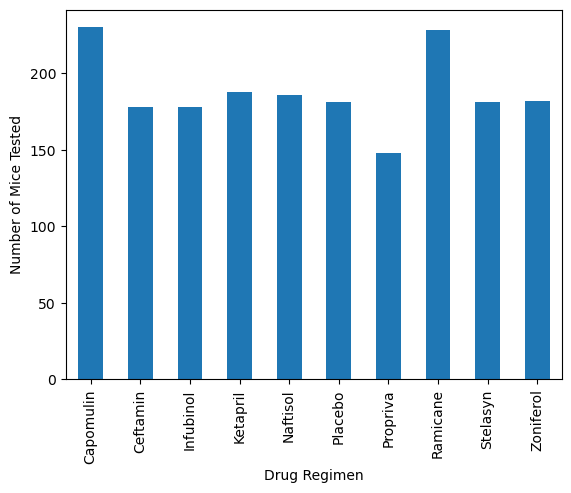

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
clean_DataFrame.groupby("Drug Regimen")["Mouse ID"].count()
clean_DataFrame.groupby("Drug Regimen")["Mouse ID"].count().plot.bar (ylabel="Number of Mice Tested")


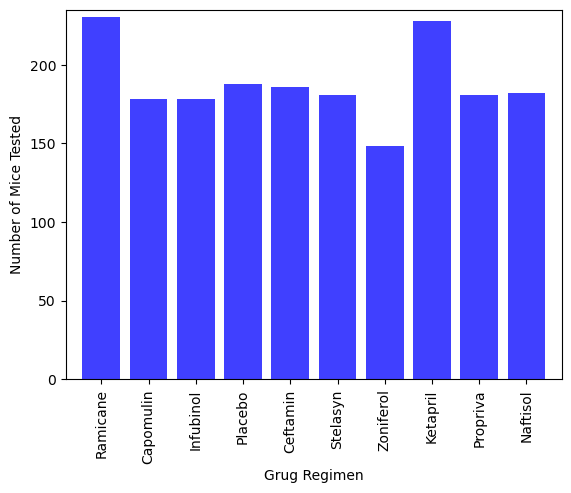

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_data = clean_DataFrame["Drug Regimen"].unique()
y_data = clean_DataFrame.groupby("Drug Regimen")["Mouse ID"].count()
x_axis = list(range(0, len(x_data)))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.xlabel("Grug Regimen")
plt.ylabel("Number of Mice Tested")

plt.xlim(-0.75, len(x_data)-.25)
plt.ylim(0, max(y_data) + 5)

plt.bar(x_axis, y_data, facecolor="blue", alpha=0.75, align="center")
plt.xticks(tick_locations, x_data, rotation="vertical")
plt.show()

<AxesSubplot:ylabel='Sex'>

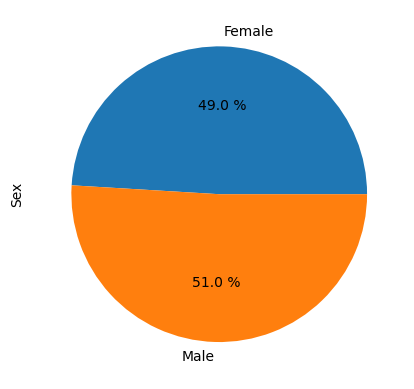

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_DataFrame.groupby(["Sex"]).count()["Mouse ID"].plot.pie(autopct="%.1f %%", ylabel="Sex")




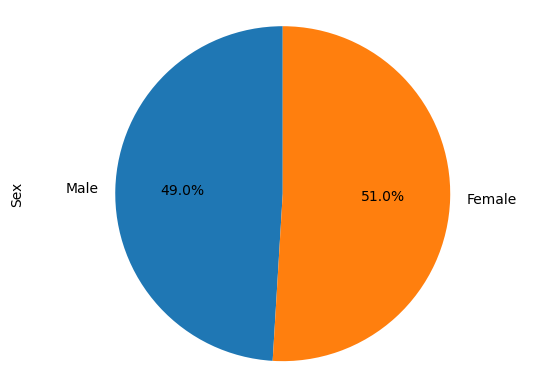

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(clean_DataFrame.groupby(["Sex"]).count()["Mouse ID"], labels=["Male","Female"],
        autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.ylabel("Sex")

plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_DataFrame.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged = clean_DataFrame.merge (greatest_timepoint ,on = ["Mouse ID","Timepoint"])
merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
empty_list =[]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments: 
    mice = merged["Tumor Volume (mm3)"][merged["Drug Regimen"]==treatment]
    q1 = mice.quantile (0.25)
    q3 = mice.quantile (0.75)
    IQR = q3-q1
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    empty_list.append (mice)
    print (mice[(mice < q1 - 1.5*IQR) | (mice> q3 + 1.5*IQR)])
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


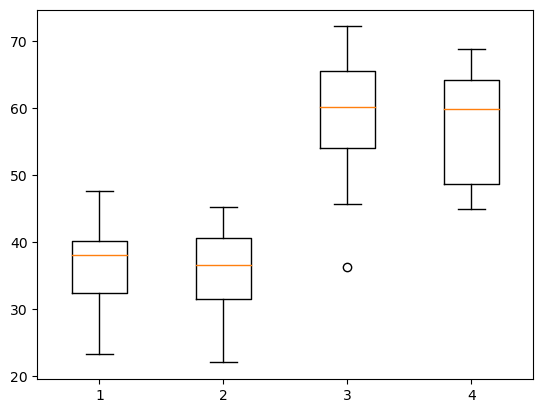

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot (empty_list)
plt.show ()

## Line and Scatter Plots

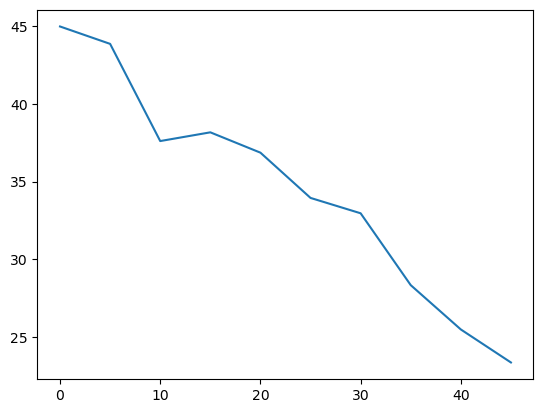

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.plot(clean_DataFrame ["Timepoint"][clean_DataFrame ["Mouse ID"]=="s185"],
         clean_DataFrame ["Tumor Volume (mm3)"][clean_DataFrame ["Mouse ID"]=="s185"])


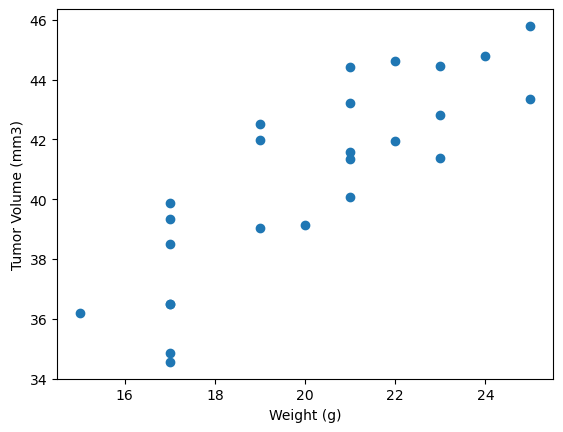

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.xlabel ("Weight (g)")
plt.ylabel ("Tumor Volume (mm3)")
Capomulin_data = clean_DataFrame.groupby (["Drug Regimen", "Mouse ID"]).mean().loc["Capomulin"]
plt.scatter (Capomulin_data["Weight (g)"],Capomulin_data["Tumor Volume (mm3)"])


## Correlation and Regression

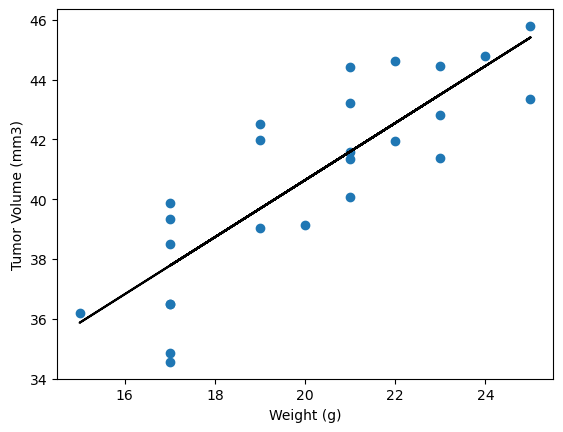

In [22]:
# Calculate the correlation coefficient and linear regression model 
x= st.linregress(Capomulin_data["Weight (g)"],Capomulin_data["Tumor Volume (mm3)"])
# for mouse weight and average tumor volume for the Capomulin regimen
Capomulin_data = clean_DataFrame.groupby (["Drug Regimen", "Mouse ID"]).mean().loc["Capomulin"]
plt.xlabel ("Weight (g)")
plt.ylabel ("Tumor Volume (mm3)")
plt.scatter (Capomulin_data["Weight (g)"],Capomulin_data["Tumor Volume (mm3)"])
plt.plot (Capomulin_data["Weight (g)"],Capomulin_data["Weight (g)"]*x.slope+x.intercept, color = "black")
